In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\flight_price.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
del df['Unnamed: 0']

In [7]:
del df['flight']

In [8]:
categorical = ['airline','source_city','departure_time','arrival_time','destination_city','class']

In [9]:
for column in categorical:
    print(column)
    print(df[column].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64
class
Economy     206666
Business     93487
Name: class, dtype: int64


In [10]:
# will consider stops as continuous

In [11]:
df.stops.replace(['zero','one','two_or_more'],[0,1,2], inplace = True)

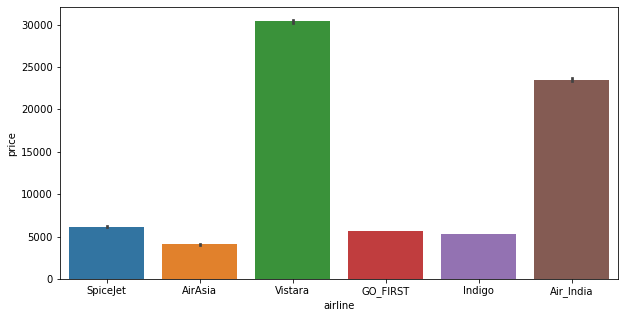

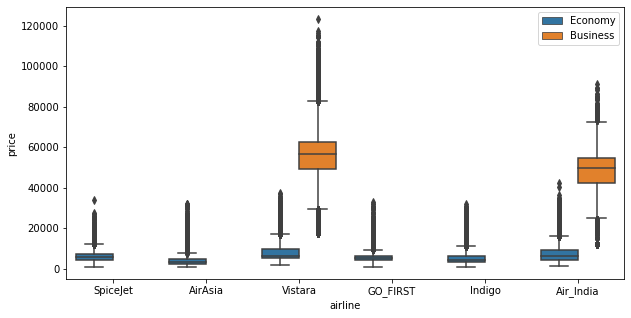

p-value 0.0
Good Predictor


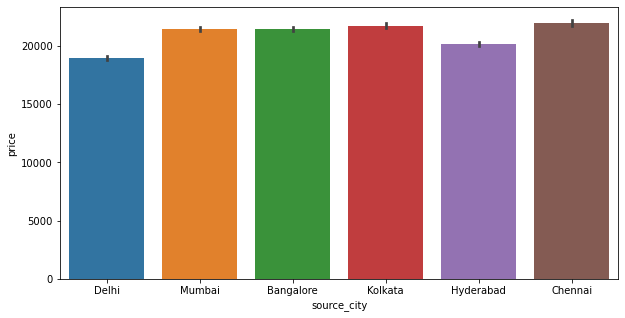

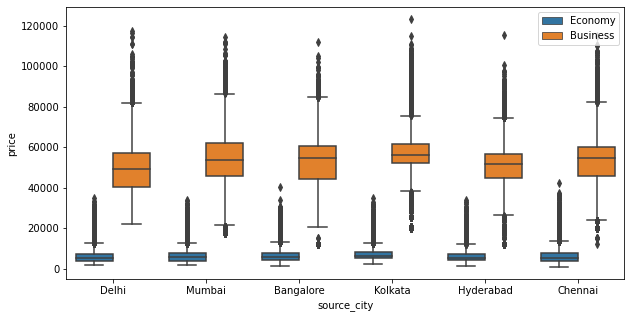

p-value 2.5500990712920574e-154
Good Predictor


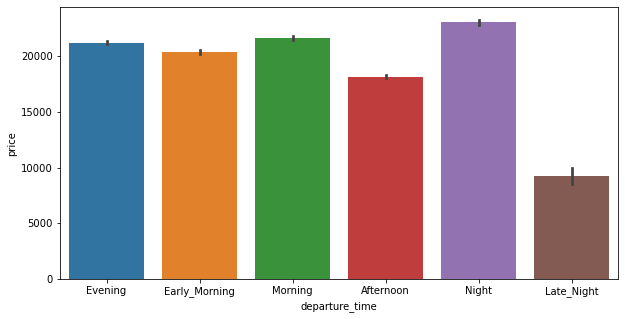

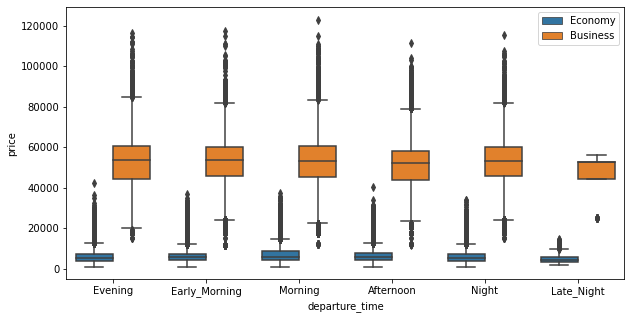

p-value 0.0
Good Predictor


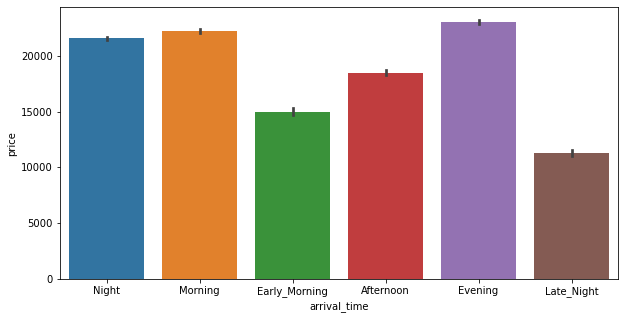

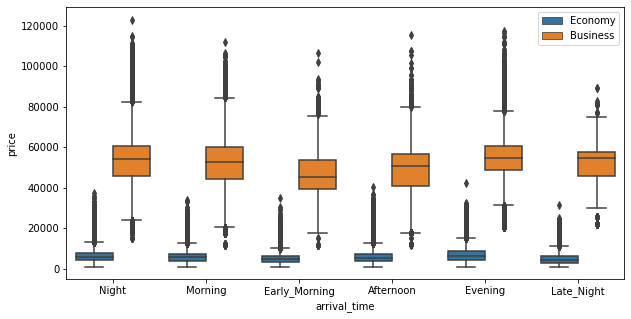

p-value 0.0
Good Predictor


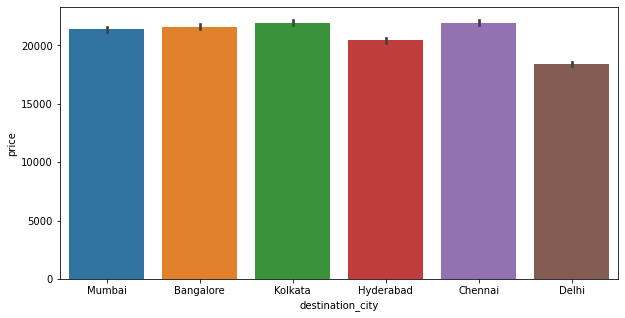

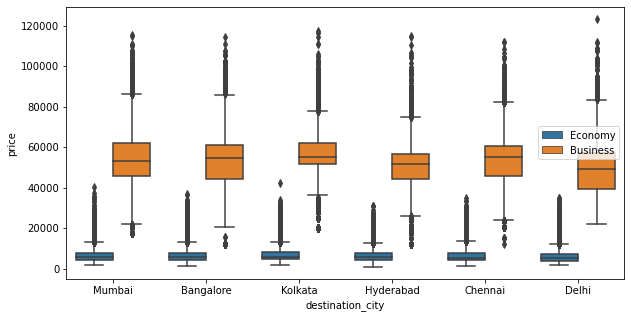

p-value 4.245267323767628e-206
Good Predictor


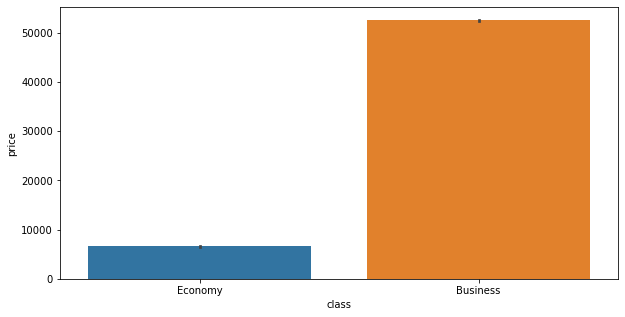

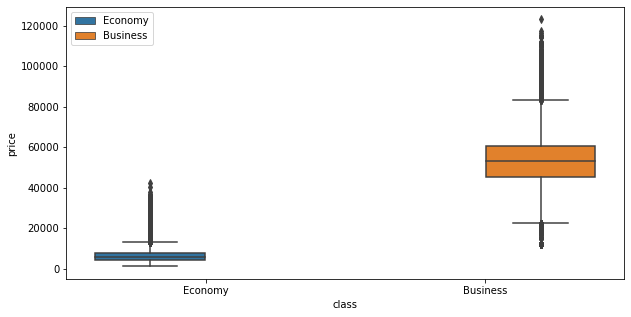

p-value 0.0
Good Predictor


In [12]:
for column in categorical:
    plt.figure(figsize = (10,5))
    sns.barplot(x = df[column], y= df['price'])
    plt.show()
    plt.figure(figsize = (10,5))
    sns.boxplot(x =df[column], y=df['price'], hue=df['class'])
    plt.legend(loc = 'best')
    plt.show()
    model = ols('price~df[column]', data = df).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    print("p-value", p)
    if p>0.05:
        print("Bad Predictor")
    else:
        print("Good Predictor")

In [13]:
continuous = ['duration','days_left', 'stops']

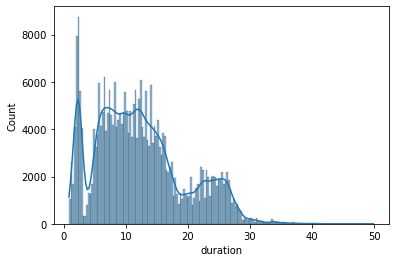

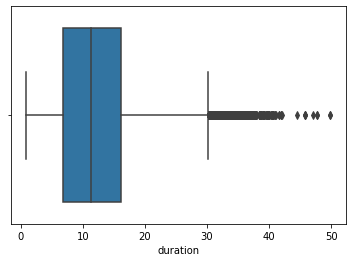

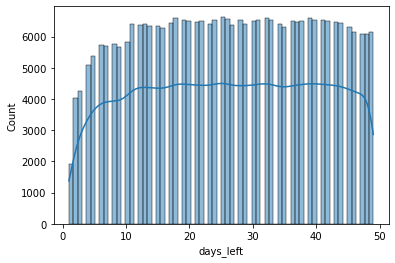

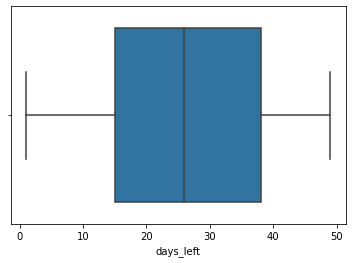

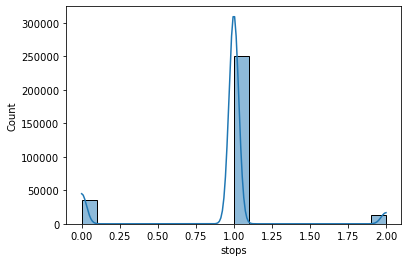

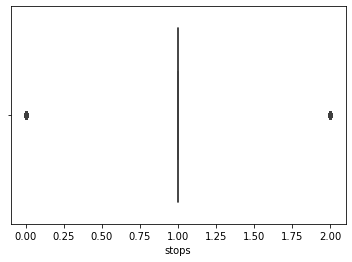

In [14]:
for column in continuous:
    plt.figure()
    sns.histplot(x = df[column], kde=True)
    plt.show()
    sns.boxplot(x = df[column], orient = 'h')

<AxesSubplot:>

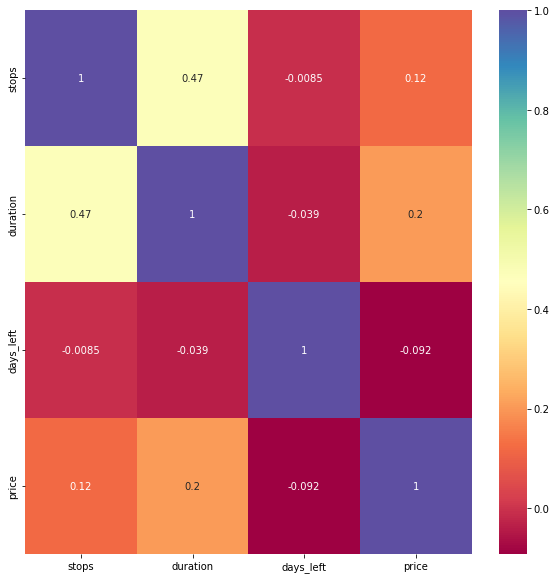

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [16]:
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [18]:
for column in categorical:
    print(column)
    print(df[column].value_counts())

airline
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline, dtype: int64
source_city
2    61343
5    60896
0    52061
4    46347
3    40806
1    38700
Name: source_city, dtype: int64
departure_time
4    71146
1    66790
2    65102
5    48015
0    47794
3     1306
Name: departure_time, dtype: int64
arrival_time
5    91538
2    78323
4    62735
0    38139
1    15417
3    14001
Name: arrival_time, dtype: int64
destination_city
5    59097
2    57360
0    51068
4    49534
3    42726
1    40368
Name: destination_city, dtype: int64
class
1    206666
0     93487
Name: class, dtype: int64


In [19]:
x = df.iloc[:, df.columns != 'price']
y = df.iloc[:, df.columns == 'price']

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
dtypes: float64(1), int32(6), int64(2)
memory usage: 13.7 MB


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr = RandomForestRegressor(n_estimators=100, random_state=123, n_jobs=-1)

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
params = {'max_depth': [6,8,10], 'max_features':['sqrt',0.25,0.5,0.75,1]}

In [26]:
rgr = RandomizedSearchCV(rfr, params, n_iter=10, cv= 3)

In [27]:
mod = rgr.fit(x,y.squeeze())

In [28]:
y_pred = mod.predict(x)

In [29]:
mod.score(x,y)

0.9501310951863094

In [30]:
from pprint import pprint

In [31]:
print(mod.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': 0.75, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


In [32]:
rfr2 = RandomForestRegressor(n_estimators=100, random_state=123, oob_score=True, n_jobs=-1, max_features= 0.75, max_depth= 6)

In [33]:
mod2 = rfr2.fit(x_train,y_train)

In [34]:
y_pred_tr = mod2.predict(x_train)

In [35]:
y_pred_te = mod2.predict(x_test)

In [36]:
mod2.score(x_test,y_test)

0.9502782497219626

In [37]:
mod2.score(x_train,y_train)

0.9502546374657297

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y_pred_te,y_test)

25529187.844193555

In [40]:
rfr2.oob_score_

0.9499929659894885